# Das Perzeptron

In der letzten Einheit haben wir gelernt, dass (reale) Objekte für den Computer nichts anderes als Datenpunkte sind. Anhand des Beispiels von Eiern der Blaumeise und Greifvögel haben wir die Höhe und Helligkeit der Eier herangezogen und als Datenpunkte im Koordinatensystem dargestellt. Im Zuge dessen haben wir unseren ersten KI-Algorithmus kennengelernt - den k-Nearest-Neighbors-Algorithmus. Im Folgenden betrachten wir unseren nächsten KI-Algorithmus, nämlich den Urgroßvater der heutigen neuronalen Netze - das Perzeptron.

Importiere zunächst alle notwendigen Bibliotheken für dieses Jupyter Notebook, indem du das untere Codefeld ausführst. Beachte, dass du bei jedem Neustart des Kernels auch das untere Codefeld jedes Mal ausführen musst.

In [24]:
# Führe dieses Feld aus, indem du entweder oben auf 'Run' klickst oder 'Strg + Enter' drückst.
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import random
import numpy as np

<h3>Motivation</h3>

Das Perzeptron versucht die Funktionweise einer Nervenzelle, auch <b>Neuron</b> genannt, nachzubilden. Sehr vereinfacht gesagt, nimmt ein Neuron elektrische (und chemische) Signale auf, verarbeitet sie und leitet die verarbeiteten Signale weiter. 


&nbsp;


 <figure>
  <img src="resources/img/neuronale_zelle.png" alt="neuronale_zelle" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Bei der Nachbildung des biologischen Neurons brauchen wir zunächst Einheiten, die eine <b>Eingabe</b> aufnehmen können. Wir beschränken uns bei der Eingabe auf zwei Zahlen $x_1$ und $x_2$ (= Datenpunkt ($x_1$, $x_2$) im zweidimensionalen Raum). Diese Zahlen werden jeweils mit sogenannte <b>Gewichten</b> des Perzeptrons $w_1$ und $w_2$ multipliziert und zusammenaddiert. Zusätzlich addiert man noch den sogenannten <b>Bias</b> $b$ hinzu. Im nächsten Verarbeitungsschritt wird diese Summe in eine <b>Aktivierungsfunktion</b> eingesetzt. Als Aktivierungsfunktion wird in einem Perzeptron typischerweise eine spezielle <b>Treppenfunktion</b> verwendet. Wenn die Eingabe dieser Treppenfunktion kleiner oder gleich $0$ ist, wird $0$ ausgegeben; wenn sie größer als $0$ ist, dann $1$:

$$ f(x) = \left\{
\begin{array}{ll}
0 & x \leq 0 \\
1 & \, \textrm{sonst} \\
\end{array}
\right. $$

Die Ausgabe des Perzeptrons kann als Zuweisung der Eingabe einer bestimmten <b>Klasse</b> interpretiert werden, also der Klasse $0$ oder $1$. Das Perzeptron <b>klassifiziert</b> die eingegebenen Daten. Wenn wir an das Beispiel mit den Vogeleiern zurückdenken, so weist das Perzeptron im Optimalfall den Eiern der Blaumeise den Wert / die Klasse 0 und den Eiern der Greifvögel den Wert / die Klasse 1 zu. 

&nbsp;


 <figure>
  <img src="resources/img/perzeptron.png" alt="perzeptron" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Setze das Perzeptron als Funktion in Python um. Rufe deine Funktion mit von dir gewählten Werten für $w_1$, $w_2$ und $b$ auf und überprüfe per Rechnung, ob die Ausgabe richtig ist.</i>

In [7]:
def step_function(x):
    if x <= 0:
        return 0
    else:
        return 1

w1 = random.uniform(0,1)
w2 = random.uniform(0,1)
b = random.uniform(0,1)
    
def perzeptron(x, y):
    sum_input = w1 * x + w2 * y + b
    return step_function(sum_input)

perzeptron(3,2)

1

In der letzten Aufgabe haben wir die Werte für $w_1$, $w_2$ und $b$ selbst festgelegt. Betrachten wir die Daten unserer Vogeleier, so möchten wir, dass das Perzeptron für einen Datenpunkt aus den Eiern der Blaumeise das Ergebnis 0 ausgibt und für einen Datenpunkt aus den Eiern der Greifvögel das Ergebnis 1. Wahrscheinlich war unsere Wahl für die Werte für $w_1$, $w_2$ und $b$ nicht optimal. Unser Ziel ist es also, dass der KI-Algorithmus selbst die optimalen Werte für $w_1$, $w_2$ und $b$ des Perzeptrons bestimmt. Bevor wir untersuchen, wie das geht, klären wir, wie die uns zur Verfügung stehende Daten überlicherweise unterteilt werden.

## Trainings- und Testdaten

Betrachten wir im Folgenden die uns zur Verfügung stehenden Daten, d.h. die Datenpunkte von den Eiern der Blaumeise und der Greifvögel. Führe dazu das folgende Feld aus, um die Datenpunkte im Koordinatensystem anzuzeigen.

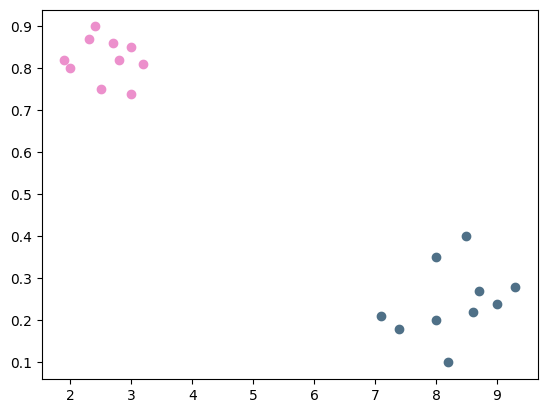

In [31]:
hoehe_eier_blaumeise = [2, 2.5, 2.7, 1.9, 3, 2.4, 2.8, 2.3, 3, 3.2]
helligkeit_eier_blaumeise = [0.8, 0.75, 0.86, 0.82, 0.74, 0.9, 0.82, 0.87, 0.85, 0.81]

hoehe_eier_greifvogel = [8.2, 8, 9, 7.4, 7.1, 8.7, 9.3, 8.6, 8.0, 8.5]
helligkeit_eier_greifvogel = [0.1, 0.2, 0.24, 0.18, 0.21, 0.27, 0.28, 0.22, 0.35, 0.4]

farbe_eier_blaumeise = '#ec90cc'
farbe_eier_greifvogel = '#4f7087'

plt.scatter(hoehe_eier_blaumeise, helligkeit_eier_blaumeise, color = farbe_eier_blaumeise)
plt.scatter(hoehe_eier_greifvogel, helligkeit_eier_greifvogel, color = farbe_eier_greifvogel)

Um eine KI mit Daten zu trainieren, unterteilen wir die uns zur Verfügung stehende Daten in <b>Trainigsdaten</b> und <b>Testdaten</b>. Ein übliches Verhältnis wäre z.B. 8:2. Auf den Trainigsdaten wird die KI trainiert, d.h. sie passt sich so an, dass sie viele Trainingsdaten richtig klassifiziert. In unserem Fall bedeutet es, dass sie einen Trainingspunkt $(2, 0.8)$ als Ei einer Blaumeise klassifiziert. Nach einem Trainingsdurchlauf (auch <b>Epoche</b> genannt) wird auf den Testdaten die Performance der KI gemessen. Es ist dabei wichtig, dass es bei den Trainings- und Testdaten keine Überschneidungen gibt!

<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Erstelle eine Liste mit allen Datenpunkten als ($x_1$, $x_2$, $l$)-Tripel. $l$ bezeichnet dabei das <b>Label</b> des Datenpunkts. Gehört der Datenpunkt zu der Klasse der Blaumeiseneier, so ist $l=0$, ansonsten ist $l=1$. Durchmische die Liste und unterteile die Daten in Trainings- und Testdaten in einem Verhältnis von 8:2.</i>

In [36]:
daten = []
for i in range(10):
    daten.append((hoehe_eier_blaumeise[i], helligkeit_eier_blaumeise[i], 0))
    daten.append((hoehe_eier_greifvogel[i], helligkeit_eier_greifvogel[i], 1))
    
print(daten)

[(2, 0.8, 0), (8.2, 0.1, 1), (2.5, 0.75, 0), (8, 0.2, 1), (2.7, 0.86, 0), (9, 0.24, 1), (1.9, 0.82, 0), (7.4, 0.18, 1), (3, 0.74, 0), (7.1, 0.21, 1), (2.4, 0.9, 0), (8.7, 0.27, 1), (2.8, 0.82, 0), (9.3, 0.28, 1), (2.3, 0.87, 0), (8.6, 0.22, 1), (3, 0.85, 0), (8.0, 0.35, 1), (3.2, 0.81, 0), (8.5, 0.4, 1)]


____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Zähle wie viele Punkte das Perzeptron mit deiner Wahl der Gewichte $w_1$ und $w_2$ und des Bias $b$ richtig klassifiziert und gebe die Genauigkeit in Prozent aus. Benutze dabei die von dir implementierte Funktion aus der ersten Aufgabe.</i>

In [18]:
correct = 0
count = 0
for elem in daten:
    if perzeptron(elem[0], elem[1]) == elem[2]:
        correct += 1
    count += 1
print(f"{correct}/{count}")

10/20


In unserem Datensatz gibt es genau so viele Eier der Blaumeise wie Eier der Greifvögel. Wenn sich jemand also bei allen Ratenversuchen für eine Klasse entscheidet, liegt seine Rategenauigkeit bei 50%. Wenn dein Perzeptron eine ähnliche Genauigkeit aufweist, dann ist dieses Ergebnis nicht besonders erstrebenswert. In nächsten Abschnitt schauen wir uns an, mit welchem Algorithmus die Gewichte angepasst werden, sodass das Perzeptron alle unsere Daten richtig klassifizieren kann.

<h3>Geometrische Betrachtung</h3>

Um die Funktionsweise des Perzeptrons anschaulich darzustellen, betrachten wir wie gehabt unsere zweidimensionalen Datenpunkte. Das Perzeptron kann aber auch $n$-dimensionale Datenpunkte für beliebige ganzzahlige $n$ klassifizieren. Zur besseren Veranschaulichung nehmen wir in den folgenden Abschnitten außerdem an, dass $b = 0$ ist. Demzufolge ist der Output des Perzeptrons $f(w_1 \cdot x_1 + w_2 \cdot x_2)$. Bei $f$ handelt es sich, um die bereits vorgestellte Aktivierungsfunktion, die $0$ ausgibt, wenn die Eingabe kleiner gleich $0$ ist, und $1$ ausgibt, wenn die Eingabe größer $0$ ist.

____

<i style="font-size:38px">?</i>

<i>Wir betrachten genau die Grenze der beiden Klassen, die zwar noch zur Klasse 0 gehört, aber trotzdem die Klassen voneinander trennt. Diese Grenze wird durch die Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ beschrieben. An was errinert dich das? <br> Tipp: Setze für $w_1$ und $w_2$ konktrete Werte ein, um dir den Sachverhalt besser zu veranschaulichen.</i>

&nbsp;
<details>
<summary>➤ Klick hier, um deine Antwort zu prüfen.</summary>

Wenn $w_1 \cdot x_1 + w_2 \cdot x_2 \leq 0$, dann wird dem Punkt $(x_1, x_2)$ die Ausgabe 0 zugewiesen; wenn $w_1 \cdot x_1 + w_2 \cdot x_2 > 0$, dann die Ausgabe $1$. Durch die Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ wird also eine Entscheidungsgrenze beschrieben. Alle Punkte, die auf dieser Grenze liegen, gehören „gerade noch so” der Klasse $0$ an. Wenn ein Punkt auf der einen Seite der Geraden liegt, so wird ihm $0$ als Ausgabe zugewiesen; wenn ein Punkt auf der anderen Seite der Geraden liegt, so wird ihm $1$ zugewiesen. <br><br>
Du kannst die Gleichung auch nach $x_2$ umstellen, sodass du die gewohnte Form einer Geradengleichung erhälst, die du aus der Schule kennst: $$x_2 = - \frac{w_1}{w_2} x_1 + 0.$$ <br><br>
    
Alternativ kannst du die „Entscheidungsgerade”, die durch die Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ beschrieben wird, auch so konstruieren, indem du Punkte wählst, deren Skalarprodukt mit dem Gewichtsvektor $\vec{w} = \begin{pmatrix} w_1 \\ w2 \end{pmatrix}$ gleich $0$ ist.
    
&nbsp;


 <figure>
  <img src="resources/img/vector.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Für die Gleichung $- x_1 + 2 x_2 = 0$ ist der Gewichtsvektor $\vec{w} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$ (in schwarz abgebildet). Interpretiert man die Punkte auf der blauen Gerade $x_2 = \frac{1}{2} \cdot x_1 + 0$ als Vektoren, so stehen all diese Vektoren senkrecht auf dem Gewichtsvektor, d.h. das Skalarproduk ist gleich $0$. <br><br>
    
Zusatzfrage: Was ändert sich, wenn b $\neq$ 0?
    
</details>

<h3>Update der Gewichte</h3>

Im letzten Abschnitt haben wir die geometrische Bedeutung der Gleichung $w_1 \cdot x_1 + w_2 \cdot x_2 = 0$ kennen gelernt. In diesem Abschnitt finden wir heraus, wie wir die Gewichte anpassen, wenn das Perzeptron Datenpunkte falsch klassifiziert.

____

<i style="font-size:38px">?</i>

&nbsp;

<details>
    
<summary>➤ Klick hier, um die Frage anzuzeigen.</summary>
    
<i>Der Punkt P $(-2, 0)$ wird vom Perzeptron falsch, der Punkt Q $(-1,1)$ wird dagegen richtig klassifiziert. Wie muss die Gerade (bzw. der <b>Gewichtsvektor</b>) angepasst werden, damit beide Punkte richtig klassifiziert werden? Beziehe in dein Update den Vektor $\vec{p} = \begin{pmatrix} -2 \\ 0 \end{pmatrix}$ mit ein.</i>
    
&nbsp;


 <figure>
  <img src="resources/img/vector2.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;
    
    
<details>

<summary>➤ Klicke hier, um die Lösung anzuzeigen.</summary>
    
Das Perzeptron klassifiziert die Punkte richtig, wenn die Entscheidungsgrenze zwischen den beiden Punkten $P$ und $Q$ verläuft. Das erreichts du, indem du den neuen Gewichtsvektor wie folgt konstruierst: ursprünglicher Gewichtsvektor minus bisschen mehr als die Hälfte des Vektor $\vec{p} = \begin{pmatrix} -2 \\ 0 \end{pmatrix}$. 
    
&nbsp;


 <figure>
  <img src="resources/img/vector3.png" alt="weight vector" style="width:30%">
  <figcaption></figcaption>
</figure> 

&nbsp;
    
</details>

</details>





____


<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Setze nun folgende Formeln zur Gewichtsanpassung als Funktion in Code um.</i>

$$w_i^{\text{neu}} = w_i^{\text{alt}} + 0.1 \cdot (o - l) \cdot x_i$$

$$b^{\text{neu}} = b^{\text{alt}} + 0.1 \cdot (o - l)$$

<i>Dabei wir mit $o$ der Output des Perzeptrons und mit $l$ das tatsächliche Label des Datenpunkts bezeichnet.</i>

In [46]:
eta = 0.01

def train(x1, x2, label):
    global w1, w2, b
    o = perzeptron(x1, x2)
    error = (o - label)
    w1 = w1 - eta * error * x1
    w2 = w2 - eta * error * x2 
    b = b - eta * error

Nun sind wir bereit, unser Perzeptron zu <b>trainieren</b>. d.h. die Gewichte allmählich an unsere Datenpunkte anzupassen. Wir geben dem Perzeptron jeden Datenpunkt als Input und überprüfen, ob das Perzeptron den Datenpunkt richtig klassifiziert. Wenn das nicht der Fall ist, rufen wir unsere Funktion auf, die wir gerade implementiert haben, um die Gewichte anzupassen.
____

<img style="float: left;" src="resources/img/laptop_icon.png" width=50 height=50 /> <br><br>

<i>Du hast bereits einen Datensatz weiter oben erzeugt. Trainiere das Perzeptron solange, bis es jeden Punkt richtig klassifiziert (maximal aber drei Epochen lang). Zeichne jedes Mal nach dem sich der Gewichtsvektor $\vec{w}$ ändert ein Schaubild mit den Punkten und der Entscheidungsgerade ein. Färbe die Punkte auf der einen Seite der Geraden in einer anderen Farbe ein, wie die Punkte auf der anderen Seite der Geraden.</i>

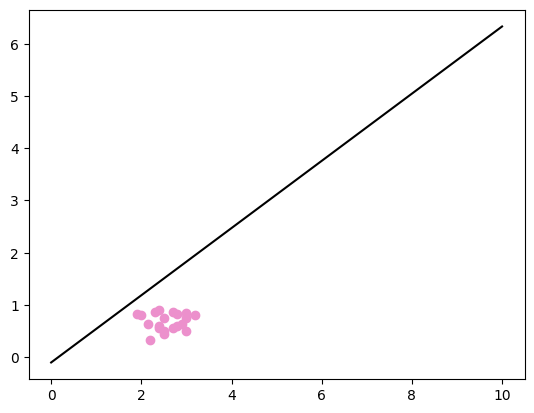

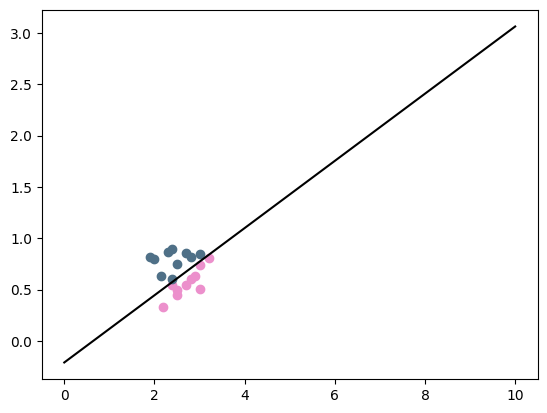

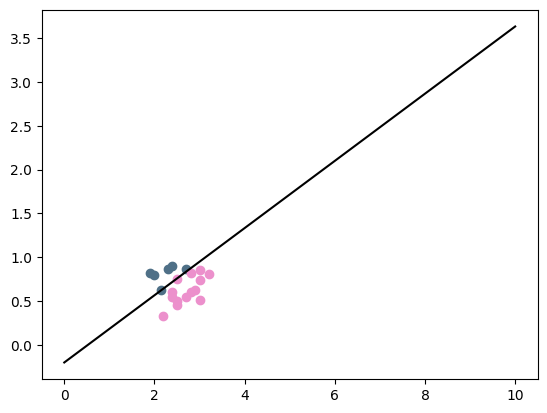

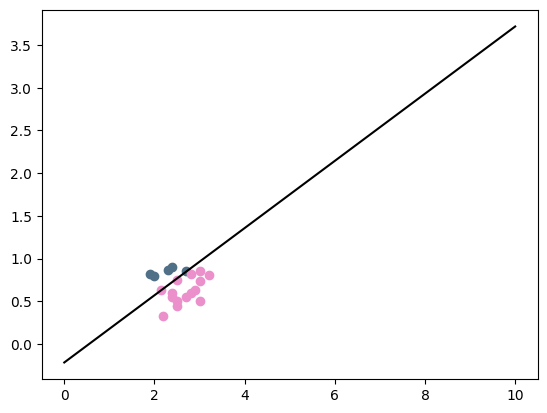

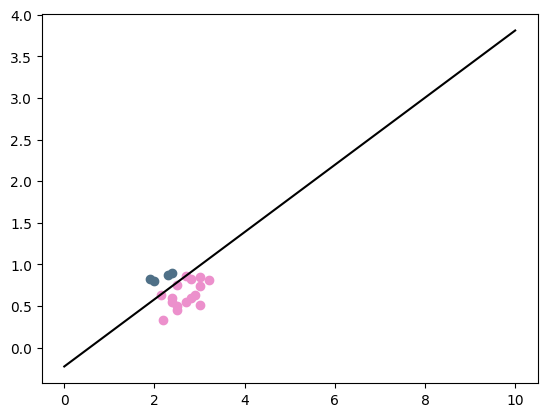

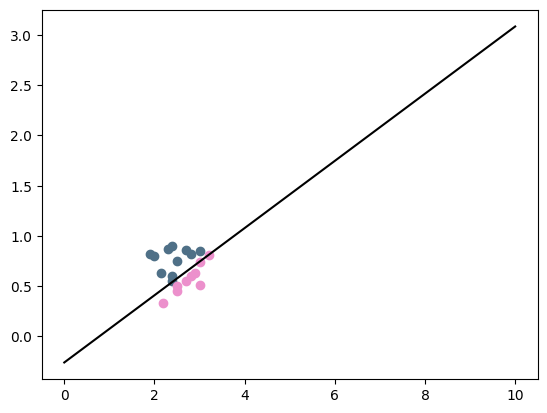

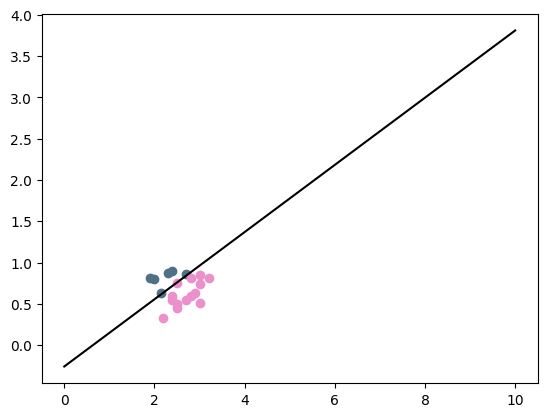

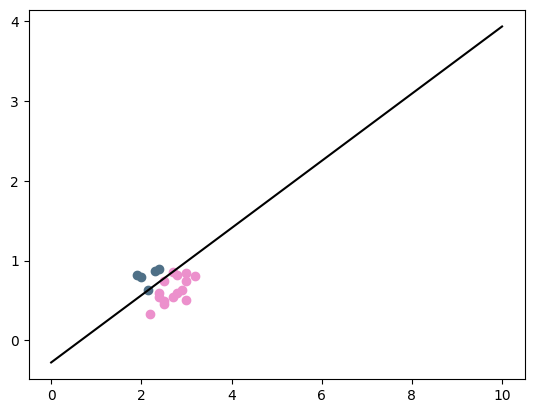

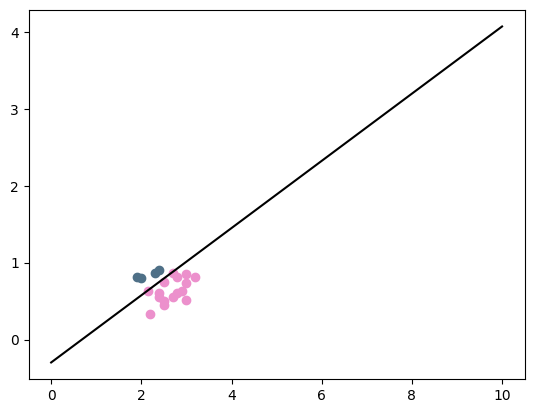

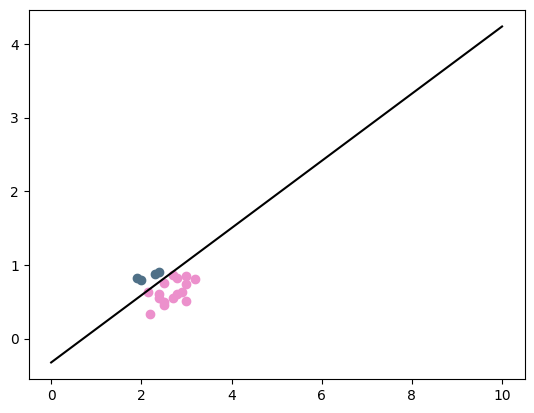

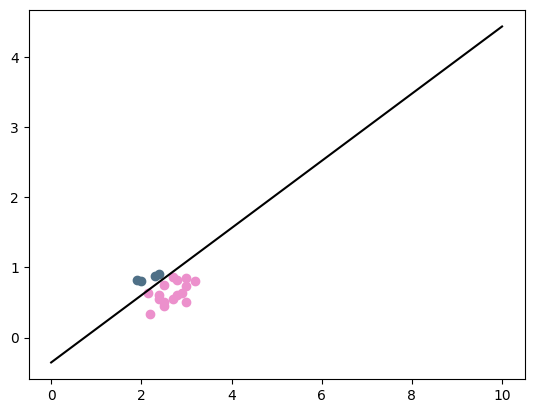

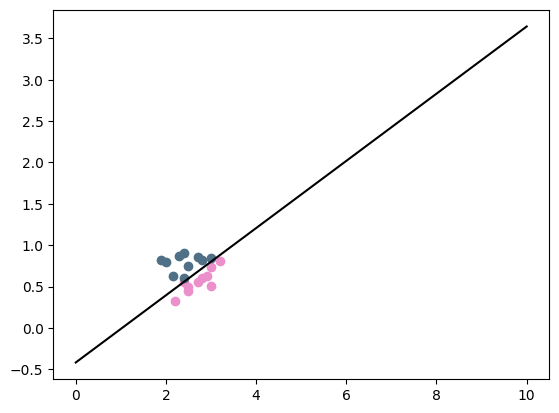

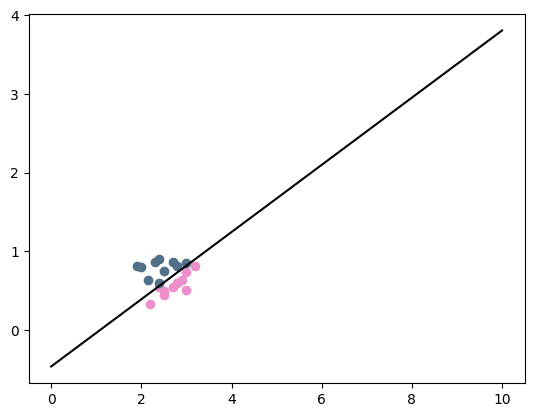

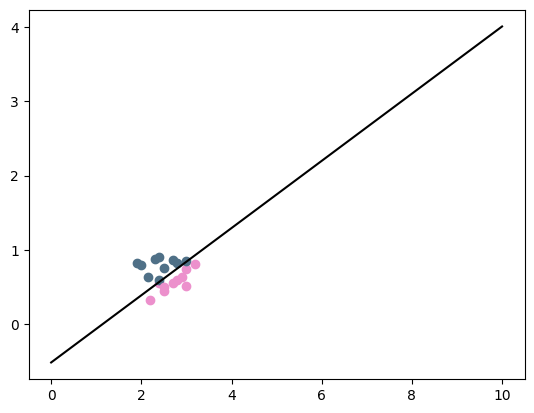

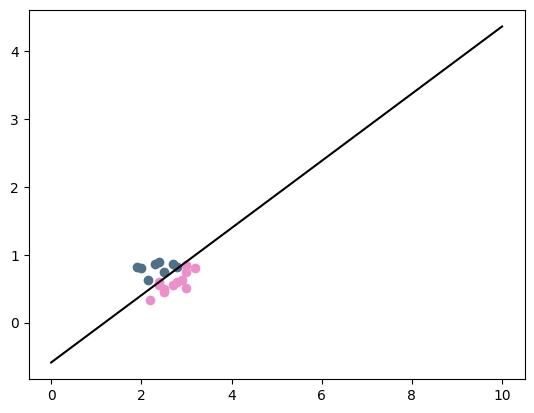

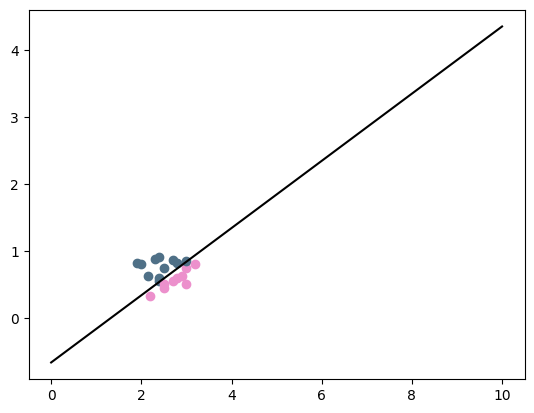

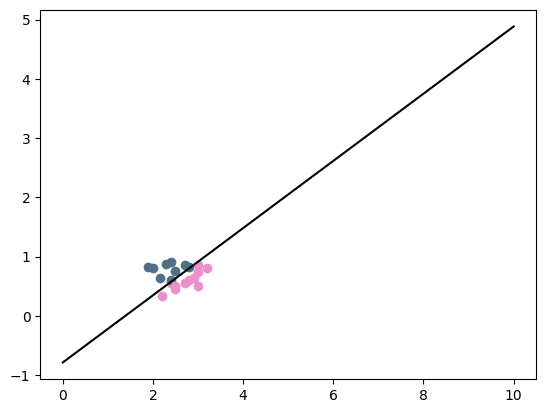

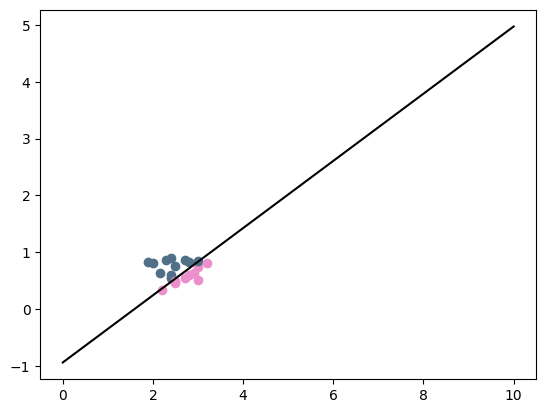

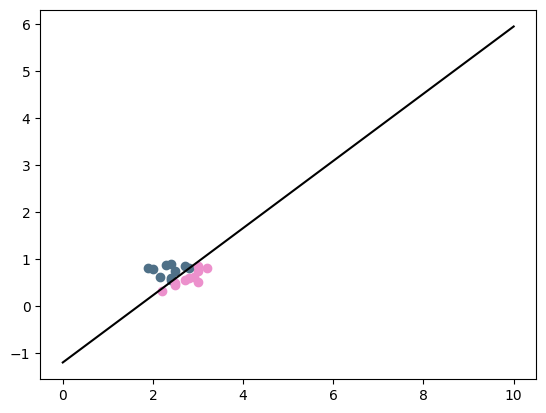

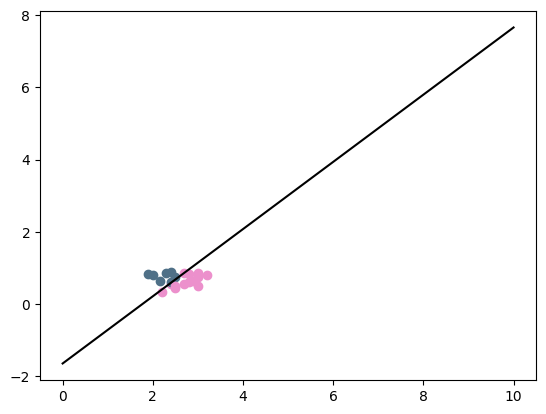

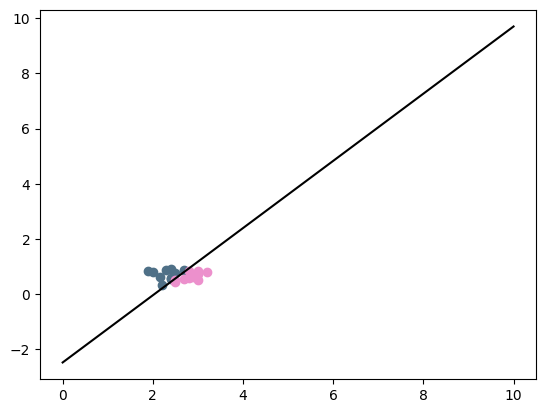

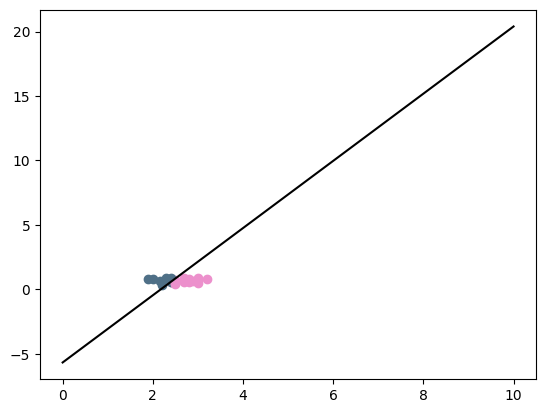

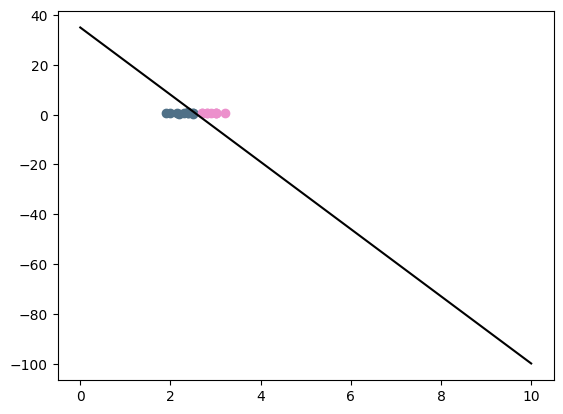

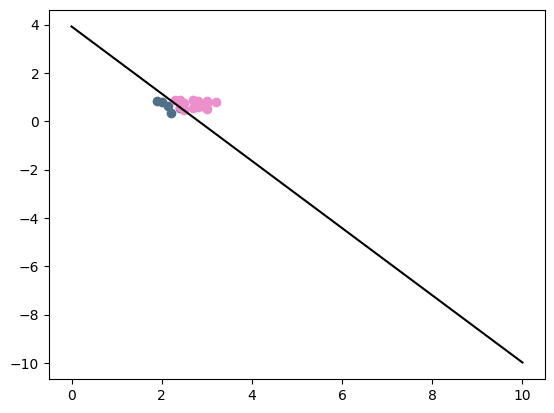

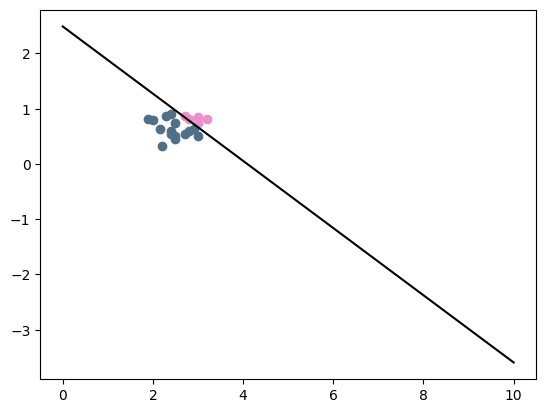

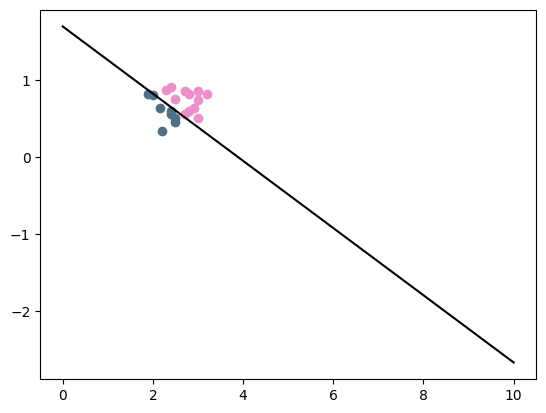

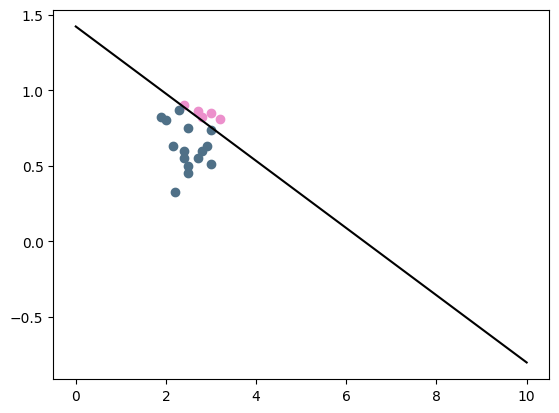

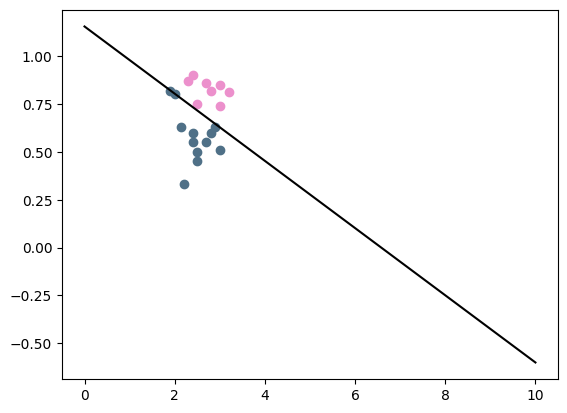

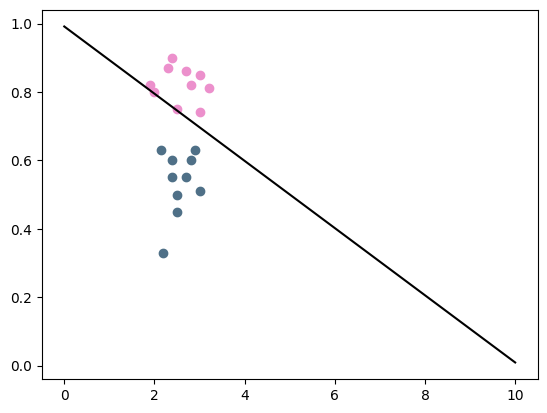

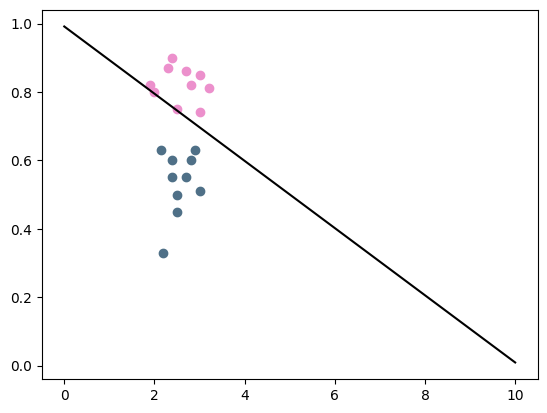

In [47]:
w1 = random.uniform(-1,1)
w2 = random.uniform(-1,1)
b = random.uniform(-1,1)

for _ in range(100):
    error_total = 0
    for elem in daten:
        
        plt.clf()
        x1 = elem[0]
        x2 = elem[1]
        label = elem[2]
        
        error = label - perzeptron(x1, x2)
        
        if w2 != 0:
            m = -w1 / w2
            c = -b / w2 
            x = np.linspace(0,10,100)
            y = m * x + c
            plt.plot(x, y, color="black")
            for element in daten: 
                if w1 * element[0] + w2 * element[1] + b <= 0:
                    plt.scatter(element[0], element[1], color=farbe_eier_blaumeise)
                else: 
                    plt.scatter(element[0], element[1], color=farbe_eier_greifvogel)
        else:
            x = -b / w1 
            plt.axvline(x = x, color="black")
            for element in l:
                if w1 * element[0][0] + b <= 0: 
                    plt.scatter(element[0], element[1], color=farbe_eier_blaumeise)
                else: 
                    plt.scatter(element[0], element[1], color=farbe_eier_greifvogel)
        
        if error != 0:
            train(x1, x2, label)
            error_total += 1
            
    if error_total == 0:
        break
    
    # plt.xlim(0,1)
    # plt.ylim(0,1)        
    plt.show()

Da die 

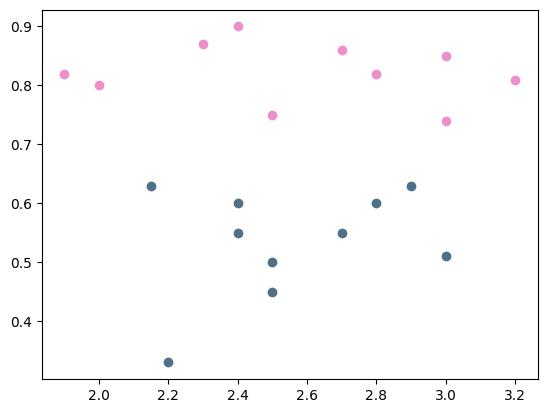

In [44]:
hoehe_eier_mini_greifvogel = [2.4, 2.8, 2.15, 2.4, 2.9, 2.5, 2.2, 2.5, 3, 2.7]
helligkeit_eier_mini_greifvogel = [0.55, 0.6, 0.63, 0.6, 0.63, 0.50, 0.33, 0.45, 0.51, 0.55]

plt.scatter(hoehe_eier_blaumeise, helligkeit_eier_blaumeise, color=farbe_eier_blaumeise)
plt.scatter(hoehe_eier_mini_greifvogel, helligkeit_eier_mini_greifvogel, color=farbe_eier_greifvogel)

daten = []
for i in range(10):
    daten.append((hoehe_eier_blaumeise[i], helligkeit_eier_blaumeise[i], 0))
    daten.append((hoehe_eier_mini_greifvogel[i], helligkeit_eier_mini_greifvogel[i], 1))

<h3>Grenzen des Perzeptrons</h3>
    
____

<i style="font-size:38px">?</i>

    
<i>Die Möglichkeiten mit dem Perzeptron Daten zu klassifizieren sind begrenzt. Hast du eine Idee, warum das so ist? Klicke die unterschiedlichen Lösungen an.</i>

&nbsp;

<details>
    
<summary>➤ 1. Nachteil</summary>
   
Das Perzeptron kann nur zwei Klassen von Datenpunkten durch eine Entscheiungsgerade voneinander trennen. Wenn der Datensatz mehr als zwei Klassen hat, ist das Perzeptron nicht in der Lage alle Datenpunkte richtig zu klassifizieren, da es nur $0$ oder $1$ als Ausgabe ausgibt.
   
</details>

&nbsp;

<details>
    
<summary>➤ 2. Nachteil</summary>
   
Wenn die Daten nicht durch eine Gerade getrennt werden können, so wird das Perzeptron nie in der Lage sein, alle Daten richtig zu klassifizieren. Probiere es selbst aus! Erzeuge einen Datensatz mit zwei Klassen, die nicht durch eine Gerade getrennt werden können und beobachte was passiert.
   
</details>

&nbsp;

<details>
    
<summary>➤ 3. Nachteil</summary>
   
Der Lernalgorithmus des Perzeptrons ist nicht optimal.
   
</details>

Im nächsten Abschnitt lernst du eine Erweiterung des Perzeptrons kennen, die die Nachteile des Perzeptrons versucht anzugehen: das neuronale Netz. 

____

<i style="font-size:38px">?</i>

    
<i>Wir haben gelernt, wie wir das Perzeptron trainieren können. Doch warum haben wir das eigentlich gemacht?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
Wir möchten das Perzeptron so trainieren, dass wir <b>unbekannte</b> Daten, auf denen wir unser Perzeptron <b>nicht</b> trainiert haben, richtig klassifizieren. Die Performance auf den <b>Trainingsdaten</b> dient zwar als Orientierung, ist aber nicht besonders wichtig.
   
</details>

<h3>Nur für Lehrende</h3>

Code zur Erzeugung des Schaubilds.

In [ ]:
plt.axis('scaled')
plt.quiver([0, 0, 0], [0, 0, 0], [-1], [2], angles='xy', scale_units='xy', scale=1, color="lightgrey")
plt.quiver([0, 0, 0], [0, 0, 0], [-2], [0], angles='xy', scale_units='xy', scale=1, color="red")
plt.quiver([0, 0, 0], [0, 0, 0], [-1], [1], angles='xy', scale_units='xy', scale=1, color="green")
plt.quiver([-1], [2], [1.5], [0], angles='xy', scale_units='xy', scale=1, linestyle='--', color="lightgrey")
plt.quiver([0], [0], [.5], [2], angles='xy', scale_units='xy', scale=1, linestyle='--', color="black")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter([-2], [0], color="red")
plt.scatter([-1], [1], color="green")
x = np.linspace(-3,3,100)
y = -0.25 * x
plt.plot(x,y)
plt.show()